# Logistic regression 실습

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Logistic regession 직접 구현해보기

In [2]:
import tensorflow as tf

# sample data
x_data = np.array([8, 10, 11, 13, 15, 31], dtype=np.float32)
y_data = np.array([0, 0, 0, 1, 1, 1], dtype=np.float32)

# set variables
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Sigmoid hypothesis
def logistic_regression(X):
    return tf.sigmoid(X * W + b)

# cost function for logistic regression
def compute_cost(X, Y):
    hypothesis = logistic_regression(X)
    cost = -tf.reduce_mean(Y * tf.math.log(hypothesis) + (1 - Y) * tf.math.log(1 - hypothesis))
    return cost

# optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)

# training step
@tf.function
def train_step(X, Y):
    with tf.GradientTape() as tape:
        cost = compute_cost(X, Y)
    gradients = tape.gradient(cost, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    return cost

# train model
for step in range(10001):
    cost_val = train_step(x_data, y_data)
    if step % 1000 == 0:
        print(f"Step: {step}, Cost: {cost_val.numpy()}, W: {W.numpy()[0]}, b: {b.numpy()[0]}")

# prediction and accuracy calculation
hypothesis = logistic_regression(x_data)
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y_data), dtype=tf.float32))

# output results
print("\nHypothesis:", hypothesis.numpy())
print("Predicted:", predicted.numpy())
print("Accuracy:", accuracy.numpy())

# display results in a DataFrame
results = pd.DataFrame({
    "y_data": y_data,
    "Hypothesis": hypothesis.numpy(),
    "Predicted": predicted.numpy()
})
display(results)

print('Accuracy:', np.sum(predicted.numpy() == y_data), '/', len(y_data), ',',
      np.round(accuracy.numpy() * 100, 2), '%')


Step: 0, Cost: 9.249722480773926, W: -0.8868511319160461, b: -0.08847559988498688
Step: 1000, Cost: 0.5671269297599792, W: 0.07748410105705261, b: -0.6384122967720032
Step: 2000, Cost: 0.5172138810157776, W: 0.1096734032034874, b: -1.1361677646636963
Step: 3000, Cost: 0.48150190711021423, W: 0.13879753649234772, b: -1.557282567024231
Step: 4000, Cost: 0.45424357056617737, W: 0.16567066311836243, b: -1.9252246618270874
Step: 5000, Cost: 0.4322678744792938, W: 0.1908128261566162, b: -2.2555975914001465
Step: 6000, Cost: 0.41378453373908997, W: 0.21455733478069305, b: -2.558574676513672
Step: 7000, Cost: 0.3977477550506592, W: 0.23712632060050964, b: -2.8407771587371826
Step: 8000, Cost: 0.383521169424057, W: 0.2586757242679596, b: -3.1065680980682373
Step: 9000, Cost: 0.37069928646087646, W: 0.2793212831020355, b: -3.3588881492614746
Step: 10000, Cost: 0.35901153087615967, W: 0.29915300011634827, b: -3.5997867584228516

Hypothesis: [0.2303098  0.35245693 0.42333353 0.5718008  0.7083757  

,y_data,Hypothesis,Predicted
0,0.0,0.230310,0.0
1,0.0,0.352457,0.0
2,0.0,0.423334,0.0
3,1.0,0.571801,1.0
4,1.0,0.708376,1.0
5,1.0,0.996578,1.0


Accuracy: 6 / 6 , 100.0 %


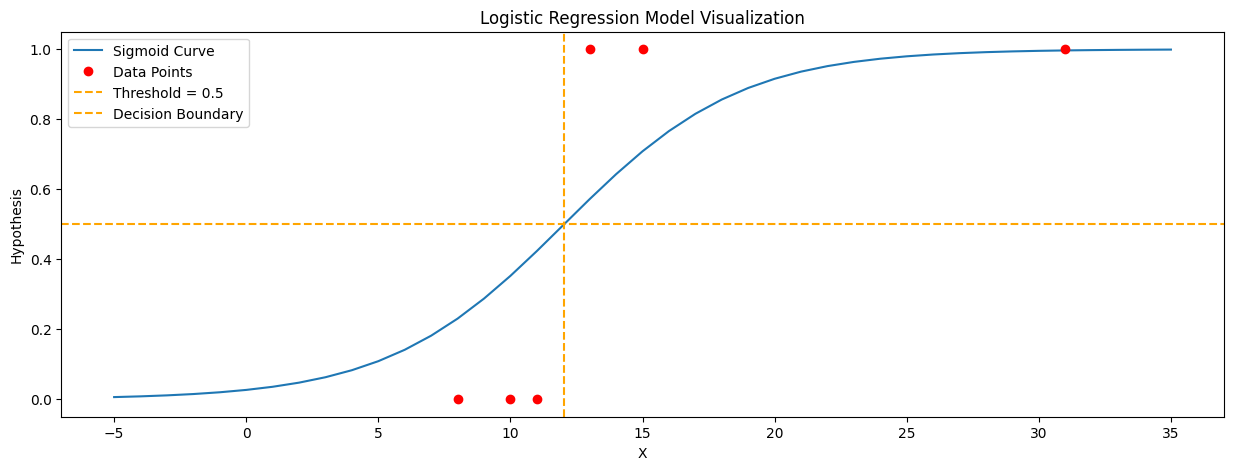

In [4]:
# generate x values for the sigmoid curve
x = np.arange(-5, max(x_data) + 5, 1)
y = 1 / (1 + np.exp(-(W.numpy()[0] * x + b.numpy()[0])))

# plot the sigmoid curve and data points
plt.figure(figsize=(15, 5))
plt.plot(x, y, label="Sigmoid Curve")
plt.plot(x_data, y_data, 'ro', label="Data Points")
plt.axhline(0.5, linestyle='--', color='orange', label="Threshold = 0.5")
plt.axvline(-b.numpy()[0] / W.numpy()[0], linestyle='--', color='orange', label="Decision Boundary")

# add labels and legend
plt.title("Logistic Regression Model Visualization")
plt.xlabel("X")
plt.ylabel("Hypothesis")
plt.legend()
plt.show()

## keras를 이용한 구현

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [7]:
# create the model
model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

# compile the model with binary crossentropy loss and SGD optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(learning_rate=0.05),
              metrics=['binary_accuracy'])

# train the model
history = model.fit(x_data, y_data, epochs=500, batch_size=6, shuffle=True)

# print model weights (W and b)
weights = model.layers[0].get_weights()
print('W:', weights[0][0], '\tb:', weights[1])

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - binary_accuracy: 0.5000 - loss: 14.9731
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - binary_accuracy: 0.5000 - loss: 10.1259
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - binary_accuracy: 0.5000 - loss: 5.2827
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - binary_accuracy: 0.5000 - loss: 0.8836
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - binary_accuracy: 0.5000 - loss: 1.1539
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - binary_accuracy: 0.5000 - loss: 0.6760
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - binary_accuracy: 0.5000 - loss: 0.7256
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - binary_accuracy: 0.5000 - loss: 0.7596
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - binary_accuracy: 0.5000 - loss: 0.9524
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - binary_accuracy: 0.5000 - loss: 0.7376
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - binary_accuracy: 0.5000 - loss: 0

In [8]:
# Make predictions using the trained model
h_out = model.predict(x_data)[:, 0]  # get the hypothesis values
p_out = h_out > 0.5  # predicted class (True/False)

# Display results as a DataFrame
display(pd.DataFrame(np.transpose(np.vstack([y_data, h_out, p_out])), columns=["y_data", "Hypothesis", "Predicted"]))

# Calculate and print accuracy
accuracy = np.sum(p_out == y_data) / len(p_out) * 100
print('Accuracy\t:', np.sum(p_out == y_data), '/', len(p_out), ',', np.round(accuracy, 2), '%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


,y_data,Hypothesis,Predicted
0,0.0,0.320958,0.0
1,0.0,0.411091,0.0
2,0.0,0.458967,0.0
3,1.0,0.556116,1.0
4,1.0,0.649156,1.0
5,1.0,0.976675,1.0


Accuracy	: 6 / 6 , 100.0 %
